# Insurance Upselling EDA Analysis - Data Wizard
* Dzulfikar Hanif Maulana (Ketua)
* Abdul Hardia Amin
* Haerunnisa
* Muhammad Fadhil Pasaribu
* Nisrina Widya Nur Farhani


## Load Data & Overview

In [96]:
# Load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [97]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory to a folder in Google Drive
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# Load dataset from gdrive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_Insurance Upselling.csv') # Jngan diubah

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,Male,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217,1
1,2.0,Male,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183,0
2,3.0,Male,47,1,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27,1
3,4.0,Male,21,1,11.0,1.0,< 1 Year,No,28619.0,152.0,203,0
4,5.0,Female,29,1,41.0,1.0,< 1 Year,No,27496.0,152.0,39,0


## Descriptive Statistical

In [ ]:
# Checking datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400164 entries, 0 to 400163
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    396486 non-null  float64
 1   Gender                396807 non-null  object 
 2   Age                   400164 non-null  int64  
 3   Driving_License       400164 non-null  int64  
 4   Region_Code           400164 non-null  float64
 5   Previously_Insured    398165 non-null  float64
 6   Vehicle_Age           400164 non-null  object 
 7   Vehicle_Damage        399071 non-null  object 
 8   Annual_Premium        400164 non-null  float64
 9   Policy_Sales_Channel  399623 non-null  float64
 10  Vintage               400164 non-null  int64  
 11  Response              400164 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 36.6+ MB


Berdasarkan statistik yang ditampilkan .info(), diketahui bahwa :
- Jumlah row untuk setiap kolom pada dataset sebanyak 400164. ini menunjukkan bahwa berdasarkan info kolom 'Non-Null Count' terdapat missing values pada kolom 'id',  'Gender', 'Previously_Insured', 'Vehicle_Damage', dan 'Policy_Sales_Channel' sehingga proses handling missing value perlu dilakukan.
- Pada kolom 'Dtype' terdapat kolom dengan tipe data yang masih perlu disesuaikan menjadi kolom bertipe data Integer (int) yaitu pada masing-masing kolom yang masih bertipe data 'float64' dan 'object'.
- untuk memudahkan proses EDA dan kemudahan dalam kompilasi Machine Learning, diperlukan proses label encoding pada kolom 'Gender' dan 'Vehicle_Damage' agar semua value kolom bernilai sama yaitu hanya memuat angka saja.
- Pada kolom 'Vehicle_Age' diperlukan proses One Hot Encoding Agar memudahkan klasifikasi kendaraan berdarkan usia kendaraan.

In [ ]:
# Checking missing values each column
print(df.isnull().sum())

id                      3678
Gender                  3357
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured      1999
Vehicle_Age                0
Vehicle_Damage          1093
Annual_Premium             0
Policy_Sales_Channel     541
Vintage                    0
Response                   0
dtype: int64


In [ ]:
# Checkig duplicate data
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

18076

In [ ]:
# Checking column names
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Categorical column by datatype
nums = ['id','Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Response']
cats = ['Gender','Vehicle_Age','Vehicle_Damage' ]

In [ ]:
# Checking statistical values in each column
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
id,396486.000000,190574.916885,110008.424002,1.000000,95279.250000,190634.500000,285814.750000,381109.000000
Age,400164.000000,38.827221,15.512161,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,400164.000000,0.997886,0.045931,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,400164.000000,26.389008,13.235256,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,398165.000000,0.458383,0.498266,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,400164.000000,30560.973126,17206.674052,2630.000000,24404.000000,31670.000000,39394.000000,540165.000000
Policy_Sales_Channel,399623.000000,112.013295,54.209897,1.000000,29.000000,132.000000,152.000000,163.000000
Vintage,400164.000000,154.379937,83.673923,10.000000,82.000000,154.000000,227.000000,299.000000
Response,400164.000000,0.122570,0.327943,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
# Checking statistical values for non numerical column
df[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,396807,400164,399071
unique,2,3,2
top,Male,1-2 Year,Yes
freq,214621,210364,201429


## Data Cleaning

### Handle missing value

In [ ]:
# Fill kolom 'id' dengan meneruskan row yang hilang
df.loc[df[df['id'].isna()].index, 'id'] = df[df['id'].isna()].index + 1

# Fill kolom 'Gender' dengan nilai mode
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)

# Drop nan values pada semua kolom
df = df.dropna()

print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


### Change Dtypes

In [ ]:
# Mengubah data type pada kolom yang ditentukan
df= df.astype({
    'id' : 'int',
    'Region_Code' : 'int',
    'Previously_Insured' : 'int',
    'Annual_Premium' : 'int',
    'Policy_Sales_Channel' : 'int',
})

### Handle Duplicates Data

In [ ]:
# Checking duplicated data after cleaning
df = df.drop_duplicates()
df.duplicated().any()

False

In [ ]:
# Checking all over dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    378137 non-null  int64 
 1   Gender                378137 non-null  object
 2   Age                   378137 non-null  int64 
 3   Driving_License       378137 non-null  int64 
 4   Region_Code           378137 non-null  int64 
 5   Previously_Insured    378137 non-null  int64 
 6   Vehicle_Age           378137 non-null  object
 7   Vehicle_Damage        378137 non-null  object
 8   Annual_Premium        378137 non-null  int64 
 9   Policy_Sales_Channel  378137 non-null  int64 
 10  Vintage               378137 non-null  int64 
 11  Response              378137 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 37.5+ MB


### Feature Encoding

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
df['Gender_Label'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage_Label'] = label_encoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
# One Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=False, dtype=int)
df_cleaned = df_encoded.copy()
df_cleaned.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     378137 non-null  int64 
 1   Gender                 378137 non-null  object
 2   Age                    378137 non-null  int64 
 3   Driving_License        378137 non-null  int64 
 4   Region_Code            378137 non-null  int64 
 5   Previously_Insured     378137 non-null  int64 
 6   Vehicle_Damage         378137 non-null  object
 7   Annual_Premium         378137 non-null  int64 
 8   Policy_Sales_Channel   378137 non-null  int64 
 9   Vintage                378137 non-null  int64 
 10  Response               378137 non-null  int64 
 11  Gender_Label           378137 non-null  int64 
 12  Vehicle_Damage_Label   378137 non-null  int64 
 13  Vehicle_Age_1-2 Year   378137 non-null  int64 
 14  Vehicle_Age_< 1 Year   378137 non-null  int64 
 15  Vehic

## Exploratory Data Analysis (EDA)

### Descriptive Statistical

In [ ]:
# Checking cleaned dataset descriptive statistical
df_cleaned.drop(['Gender','Vehicle_Damage'], axis=1).describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000,378137.000000
mean,190618.045830,38.824159,0.997871,26.387656,0.458278,30565.969865,112.029344,154.333421,0.122522,0.544639,0.504833,0.525566,0.432401,0.042032
std,110078.312533,15.512508,0.046090,13.230263,0.498257,17209.746438,54.202608,83.675933,0.327888,0.498004,0.499977,0.499347,0.495410,0.200663
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95271.000000,25.000000,1.000000,15.000000,0.000000,24408.000000,29.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,190654.000000,36.000000,1.000000,28.000000,0.000000,31671.000000,132.000000,154.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,285955.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,400067.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Univariate Analysis

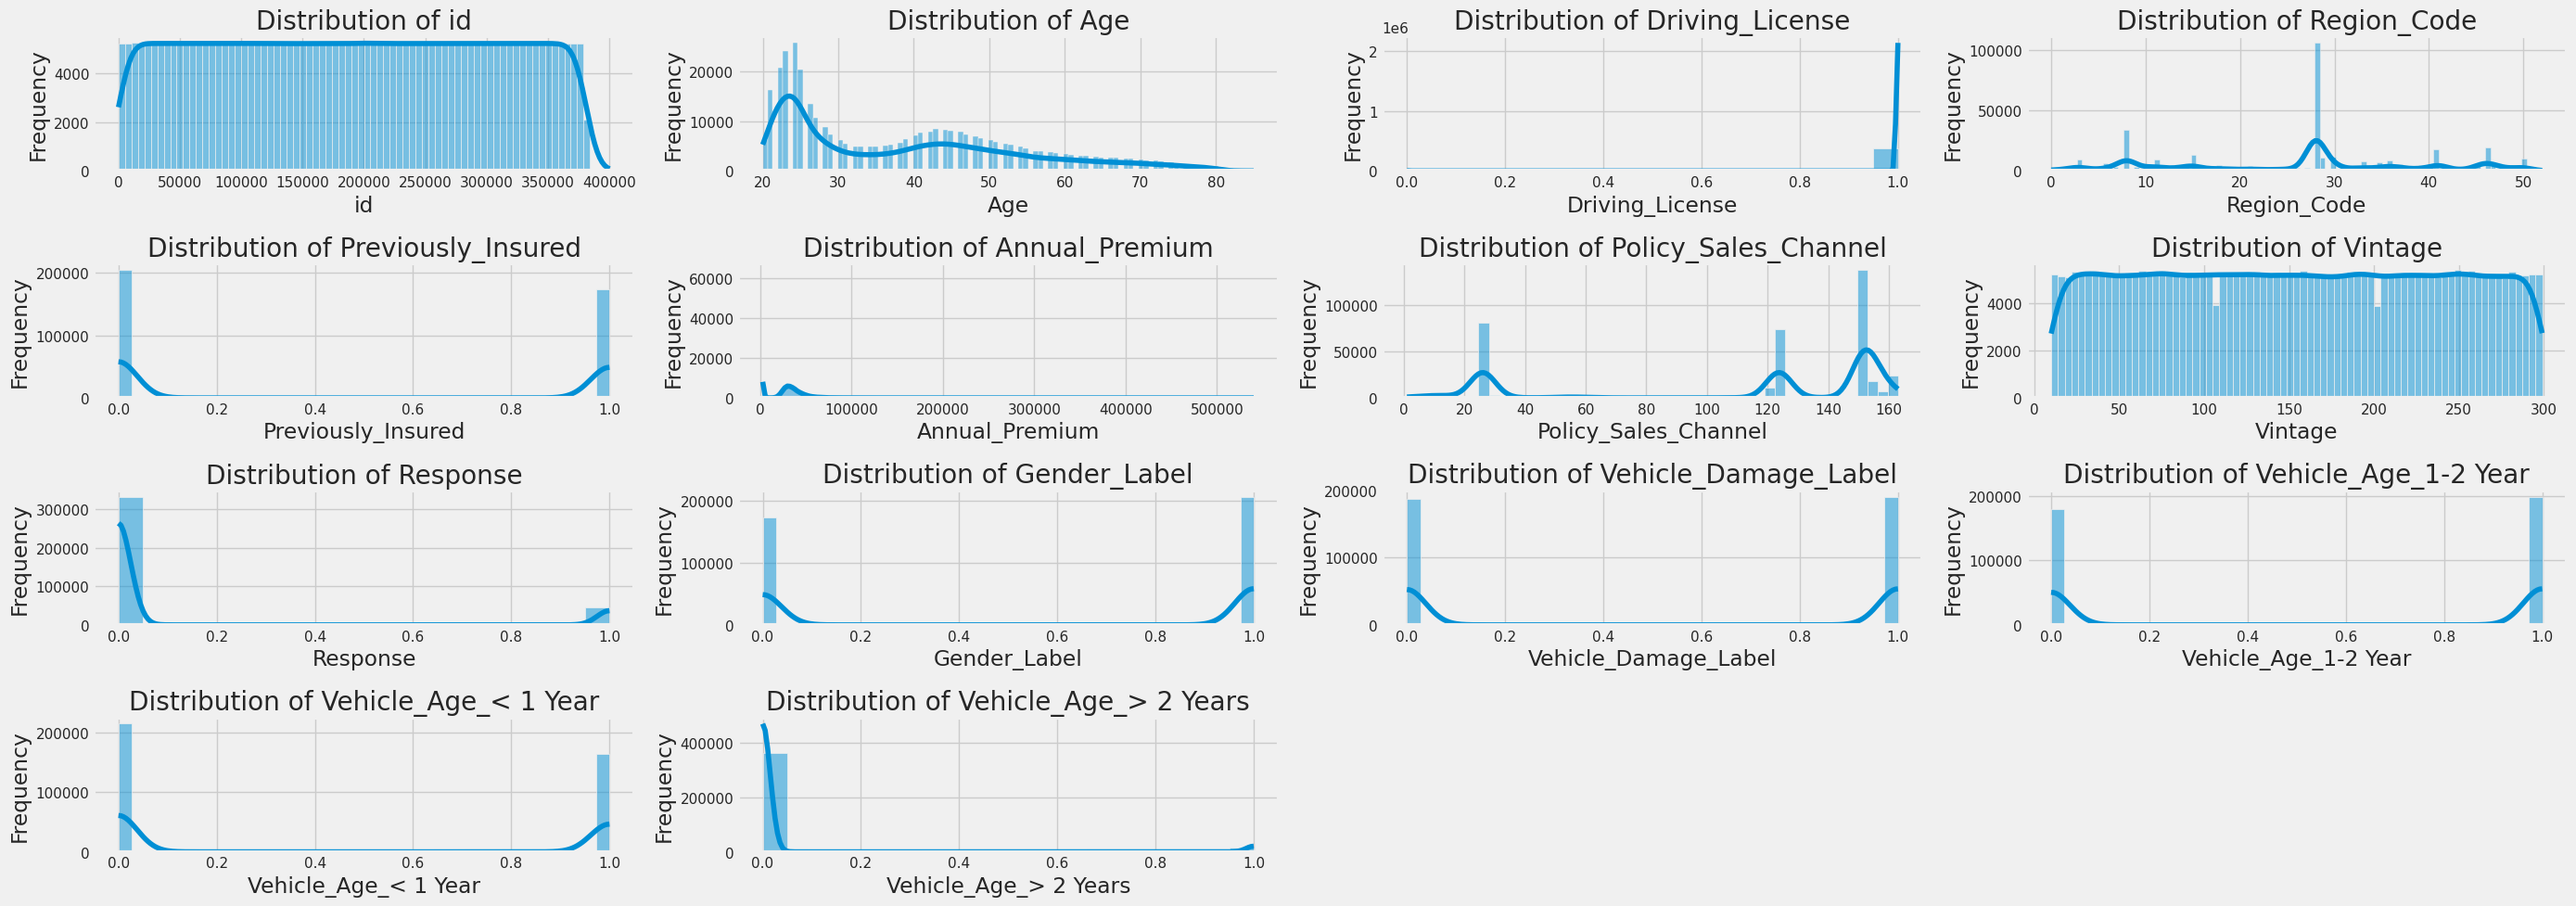

In [ ]:
df_numericals = df_cleaned.select_dtypes(include=['int64'])
num_columns_per_row = 4
num_rows = -(-len(df_numericals.columns) // num_columns_per_row)

plt.figure(figsize=(28, 10))
for i, column in enumerate(df_numericals.columns):
    plt.subplot(num_rows, num_columns_per_row, i+1)
    sns.histplot(df_numericals[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Berdasarkan grafik distribusi (kde-plot) pada masing-masing kolom didapatkan beberapa informasi, diantaranya:
- **Distribusi kolom ‘Age':** condong ke kanan (skewed positif).
- **Distribusi Premi Tahunan (Annual_Premium):** Distribusi ini condong ke kanan dengan potensi outlier pada nilai premi yang jauh lebih tinggi.
- D**istribusi Memiliki SIM (Driving License):** Hampir semua individu memiliki SIM, dengan sedikit outlier yang tidak memiliki.
- **Distribusi Respon (Response):** Terdapat ketidakseimbangan dengan lebih banyak Value yang masuk ke satu kategori daripada yang lain. (Respon 0 lebih banyak dari respon 1)
- **Distribusi Gender (Gender Label1 dan Gender Label2): ** Terdapat ketidakseimbangan antara gender.

Berikut tindakan yang dapat diambil selama pre-processing data berdasarkan distribusi ini:
- **Investigasi outlier pada ‘Annual Premium’ yang tinggi**, karena dapat mempengaruhi performa model atau mungkin merupakan kesalahan.
- **Mengatasi ketidakseimbangan kelas pada ‘Response’ dan ‘Gender’** dengan teknik oversampling atau undersampling untuk mencegah bias model terhadap kelas mayoritas.
- **Pertimbangkan normalisasi atau transformasi** pada distribusi yang condong seperti** ‘Age’ dan ‘Annual Premium’** untuk algoritma yang mengasumsikan normalitas.

### Multivariate Analysis

<Axes: >

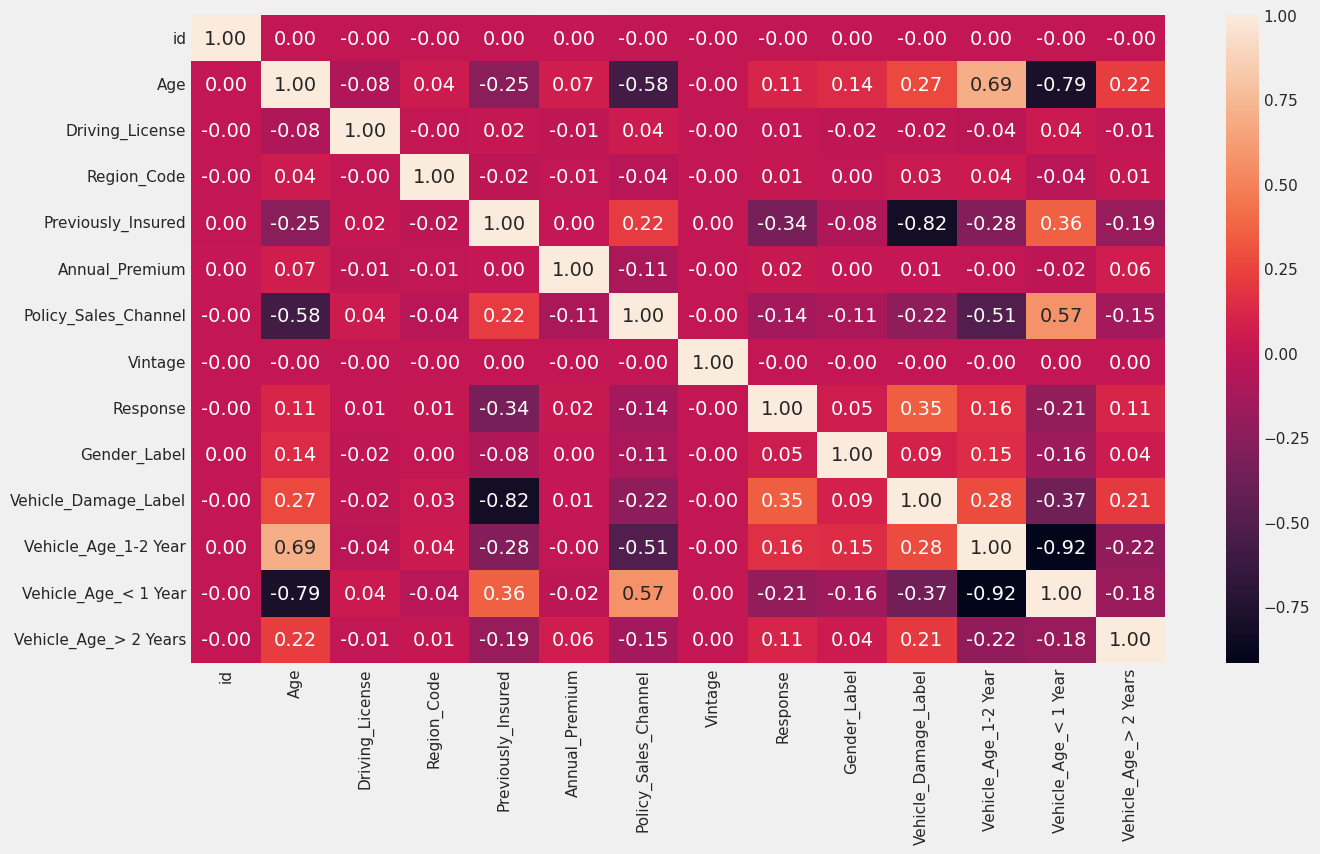

In [ ]:
# Checking correlation each column
plt= plt.figure (figsize= (14, 8))
df_numericals = df_cleaned.select_dtypes(include=['int64'])
sns.heatmap(df_numericals.corr(), annot=True, fmt='.2f')

Dengan menjadikan kolom **'Response' sebagai variabel target,** maka berdasarkan visualisasi heatmap didapatkan beberapa insight korelasi sebagai berikut:

- korelasi **'Response' terhadap kolom 'Vehicle_Damage' memiliki korelasi positif yang paliing tinggi yaitu 0.35**. Angka ini menunjukkan kendaraan yang pernah mengalami kerusakan cenderung memberi response satu (1) atau tertarik dengan asuransi kendaraan.
- kolom **'Response' terhadap  usia kendaraan** juga memiliki korelasi yang tinggi cukup tinggi, yaitu pada kolom **'Vehicle_Age_1-2_Year' dengan korelasi 0.16 dan kolom 'Vehicle_Age_>2 Years' dengan korelasi 0.11.** Sedangkan untuk kolom **'Vehicle_Age_< 1 Year' memiliki korelasi negative yaitu -0.21**.
- korelasi **'Response' terhadap kolom 'Age'**  memiliki korelasi positif walaupun korelasinya **tidak terlalu tinggi yaitu 0.11.**
- korelasi 'Response' terhadap kolom 'Previosly_Insured' memiliki korelasi negatif yang tinggi yaitu -0.34, yang artinya response tertarik pada asuransi kendaraan paling banyak diberikan oleh pelanggan yang belum pernah memiliki asuransi kendaraan.
- kolom **'Response' terhadap kolom 'POlicy_Sales Channel' memiliki korelasi negatif yaitu -0.14** yang artinya **response tertarik pada asuransi tidak terlalu dipengaruhi oleh frekuensi panggilan terhadap pelanggan.**
- Selain yang telah disebutkan diatas, korelasi **'Response' terhadap kolom lain sangat rendah atau hampir tidak memiliki korelasi yaitu terhadap kolom 'id','Gender', 'Age', 'Driving_License', 'Region_Code','Annual_Premium', dan 'Vintage'.**



In [ ]:
# Checking column name
df_cleaned.columns

In [ ]:
# Checking all variabel to response
grouped = df_cleaned.groupby('Response')
sorted_df = grouped.apply(lambda x: x.sort_values(by=["Previously_Insured", "Vehicle_Damage_Label",'Response', 'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],ascending = False))
sorted_df

id  Gender  Age  Driving_License  Region_Code  \
Response                                                             
0        108        109    Male   72                1           46   
         229        230  Female   64                1           28   
         319        320    Male   43                1            5   
         349        350  Female   60                1           36   
         533        534    Male   53                1           28   
...                 ...     ...  ...              ...          ...   
1        377613  377614    Male   30                1           28   
         378069  378070  Female   21                1           13   
         378639  378640    Male   23                1           30   
         379304  379305    Male   21                1           46   
         379724  379725  Female   22                1           36   

                 Previously_Insured Vehicle_Damage  Annual_Premium  \
Response                                                             
0        108                      1            Yes           28698   
         229                      1            Yes           41697   
         319                      1            Yes            2630   
         349                      1            Yes           36638   
         533                      1            Yes           36544   
...                             ...            ...             ...   
1        377613                   0             No            2630   
         378069                   0             No           25849   
         378639                   0             No            2630   
         379304                   0             No            2630   
         379724                   0             No           41703   

                 Policy_Sales_Channel  Vintage  Response  Gender_Label  \
Response                                                                 
0        108                       30      216         0             1   
         229                       26      287         0             0   
         319                      124      178         0             1   
         349                      124       33         0             0   
         533                       26      182         0             1   
...                               ...      ...       ...           ...   
1        377613                   156      154         1             1   
         378069                   152      115         1             0   
         378639                   152      207         1             1   
         379304                   160      150         1             1   
         379724                   152      280         1             0   

                 Vehicle_Damage_Label  Vehicle_Age_1-2 Year  \
Response                                                      
0        108                        1                     1   
         229                        1                     1   
         319                        1                     1   
         349                        1                     1   
         533                        1                     1   
...                               ...                   ...   
1        377613                     0                     0   
         378069                     0                     0   
         378639                     0                     0   
         379304                     0                     0   
         379724                     0                     0   

                 Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
Response                                                      
0        108                        0                      0  
         229                        0                      0  
         319                        0                      0  
         349                        0                      0  
         533                        0 

### Variable Correlation

#### Target (Response)

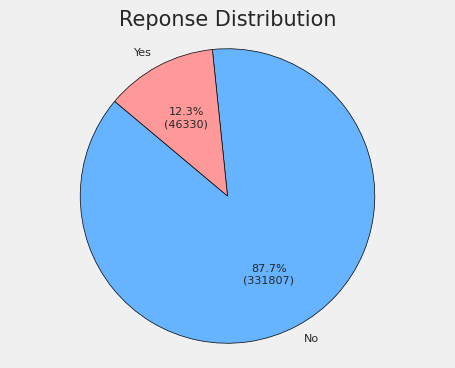

In [ ]:
# Pie chart of response column (ubah commnet sesuai column)
response_counts = df_cleaned['Response'].value_counts() # Ubah berdasarkan EDA column
labels = ['No', 'Yes']  # Ubah labels sesuai values yang ada pada column

plt.figure(figsize=(5, 4))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

wedges, texts, autotexts = plt.pie(
    response_counts, # Ubah disini sesuai line 1
    labels=labels,  # Ubah sesuai line 2
    autopct=autopct_format(response_counts), # Ubah sesuai line 1
    startangle=140,
    colors=['#66b3ff','#ff9999'], # Ubah warna seusai dengan values
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('equal')
plt.title('Reponse Distribution', fontsize=15)  # Ubah sesuai nama kolom

for text in texts + autotexts:
    text.set_fontsize(8)

plt.show()

- Kolom **'Response'** menjadi variabel target pada dataset.
- Distribusi value menunjukkan respon positif yaitu 'Yes' lebih rendah dibandingkan respon 'No'. Nilai ini menunjukkan bahwa lebih banyak customer yang memberi respon tidak tertarik pada asuransi kendaraan.

#### Gender

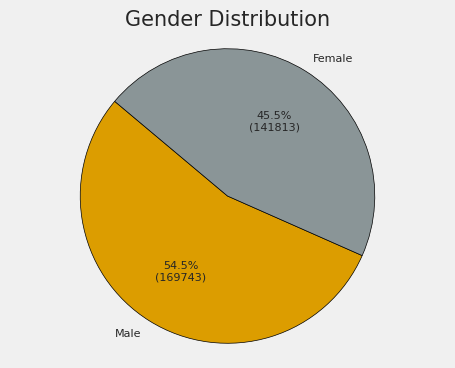

In [ ]:
# Pie chart of gender column (ubah commnet sesuai column)
gender_counts = df_cleaned['Gender'].value_counts() # Ubah berdasarkan EDA column
# labels = ['No', 'Yes']  # Ubah labels sesuai values yang ada pada column

plt.figure(figsize=(5, 4))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

wedges, texts, autotexts = plt.pie(
    gender_counts, # Ubah disini sesuai line 1
    labels=gender_counts.index,  # Ubah sesuai line 2
    autopct=autopct_format(gender_counts), # Ubah sesuai line 1
    startangle=140,
    colors=['#DC9D00','#8A9597'], # Ubah warna seusai dengan values
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('equal')
plt.title('Gender Distribution', fontsize=15)  # Ubah sesuai nama kolom

for text in texts + autotexts:
    text.set_fontsize(8)

plt.show()

In [ ]:
# Table using ratio for gender and response column  (ubah commnet sesuai column)
gender_group = df_cleaned.groupby(['Gender','Response']).agg({'Gender':'count'}).rename(     # Ubah nama dataframe sesuai kolom
    columns={'Gender':'total_count'}
).reset_index()
gender_group['ratio'] = gender_group['total_count'] / gender_group['total_count'].sum() *100  # Ubah sesuai line 1 (nama dataframe)
gender_group['ratio'] = gender_group['ratio'].apply(lambda x: '{:.2f}'.format(x))   # Ubah sesuai line 1 (nama dataframe)
gender_group = gender_group.astype({'ratio':'float'})
gender_group

,Gender,Response,total_count,ratio
0,Female,0,154292,40.80
1,Female,1,17897,4.73
2,Male,0,177515,46.94
3,Male,1,28433,7.52


Text(0.5, 0, 'Gender')

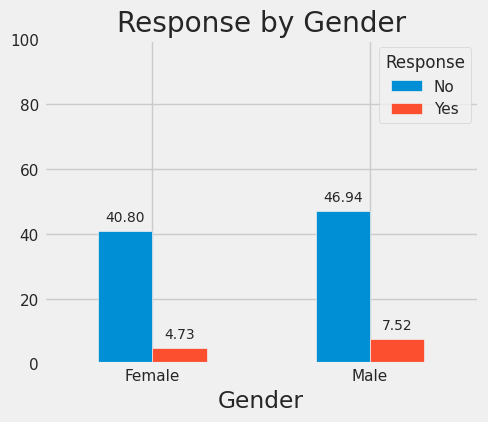

In [ ]:
# Gender terhadap response dalam rasio barplot (ubah commnet sesuai column)
bar_plot = gender_group.pivot(  # Ubah sesuai data frame yang digunakan
    index='Gender', columns='Response', values='ratio'  # Ubah sesuai kolom pada data frame yang digunakan
).plot(kind='bar', figsize=(5,4), rot=0)
plt.ylim(0,100)
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:,.2f}',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom',
                      size=10, xytext=(0, 5),
                      textcoords='offset points')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.title('Response by Gender') # Ubah berdasarkan kolom
plt.xlabel('Gender')  # Ubah sesuai kolom

- Customer terdiri dari 45,5% wanita dan 54,5% pria.
- Dari persentase tersebut gender dibagi kembali berdasarkan respon “yes” dan “no”.
- **Perbandingan respon “yes” dan “no” antara gender pria dan wanita hampir sama.** Respon “no” jauh lebih banyak dibandingkan dengan respon “yes”.

#### Age

In [ ]:
# Membuat range untuk umur pad kolom baru
bins = [20, 30, 40, 50, 60, 70, 80, 89]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-88']
df_cleaned['age_group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

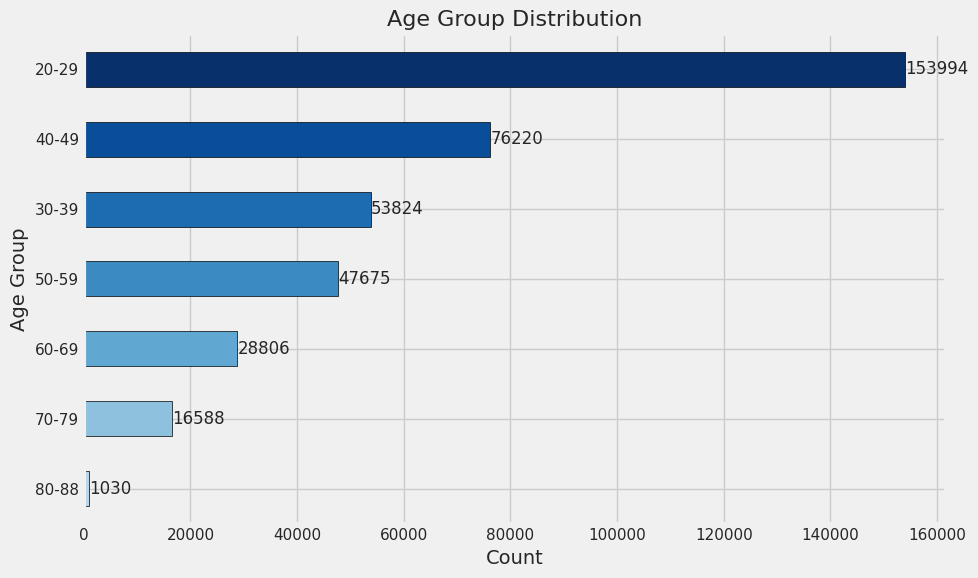

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

age_counts = df_cleaned['age_group'].value_counts(ascending=True)
colors = plt.cm.Blues(np.linspace(0.3, 1, len(age_counts)))

plt.figure(figsize=(10, 6))
bars = age_counts.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Age Group Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

for i, v in enumerate(age_counts):
    plt.text(v + min(age_counts) * 0.01, i, str(v), va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Table using ratio for age and response column  (ubah commnet sesuai column)
age_group = df_cleaned.groupby(['age_group','Response']).agg({'Gender':'count'}).rename(     # Ubah nama dataframe sesuai kolom
    columns={'Gender':'total_count'}
).reset_index()
age_group['ratio'] = age_group['total_count'] / age_group['total_count'].sum() *100  # Ubah sesuai line 1 (nama dataframe)
age_group['ratio'] = age_group['ratio'].apply(lambda x: '{:.2f}'.format(x))   # Ubah sesuai line 1 (nama dataframe)
age_group = age_group.astype({'ratio':'float'}) # Ubah sesuai line 1 (nama dataframe)
age_group # Ubah sesuai line 1 (nama dataframe)

,age_group,Response,total_count,ratio
0,20-29,0,147675,39.05
1,20-29,1,6319,1.67
2,30-39,0,43054,11.39
3,30-39,1,10770,2.85
4,40-49,0,60031,15.88
5,40-49,1,16189,4.28
6,50-59,0,39247,10.38
7,50-59,1,8428,2.23
8,60-69,0,25512,6.75
9,60-69,1,3294,0.87


<Figure size 1000x600 with 0 Axes>

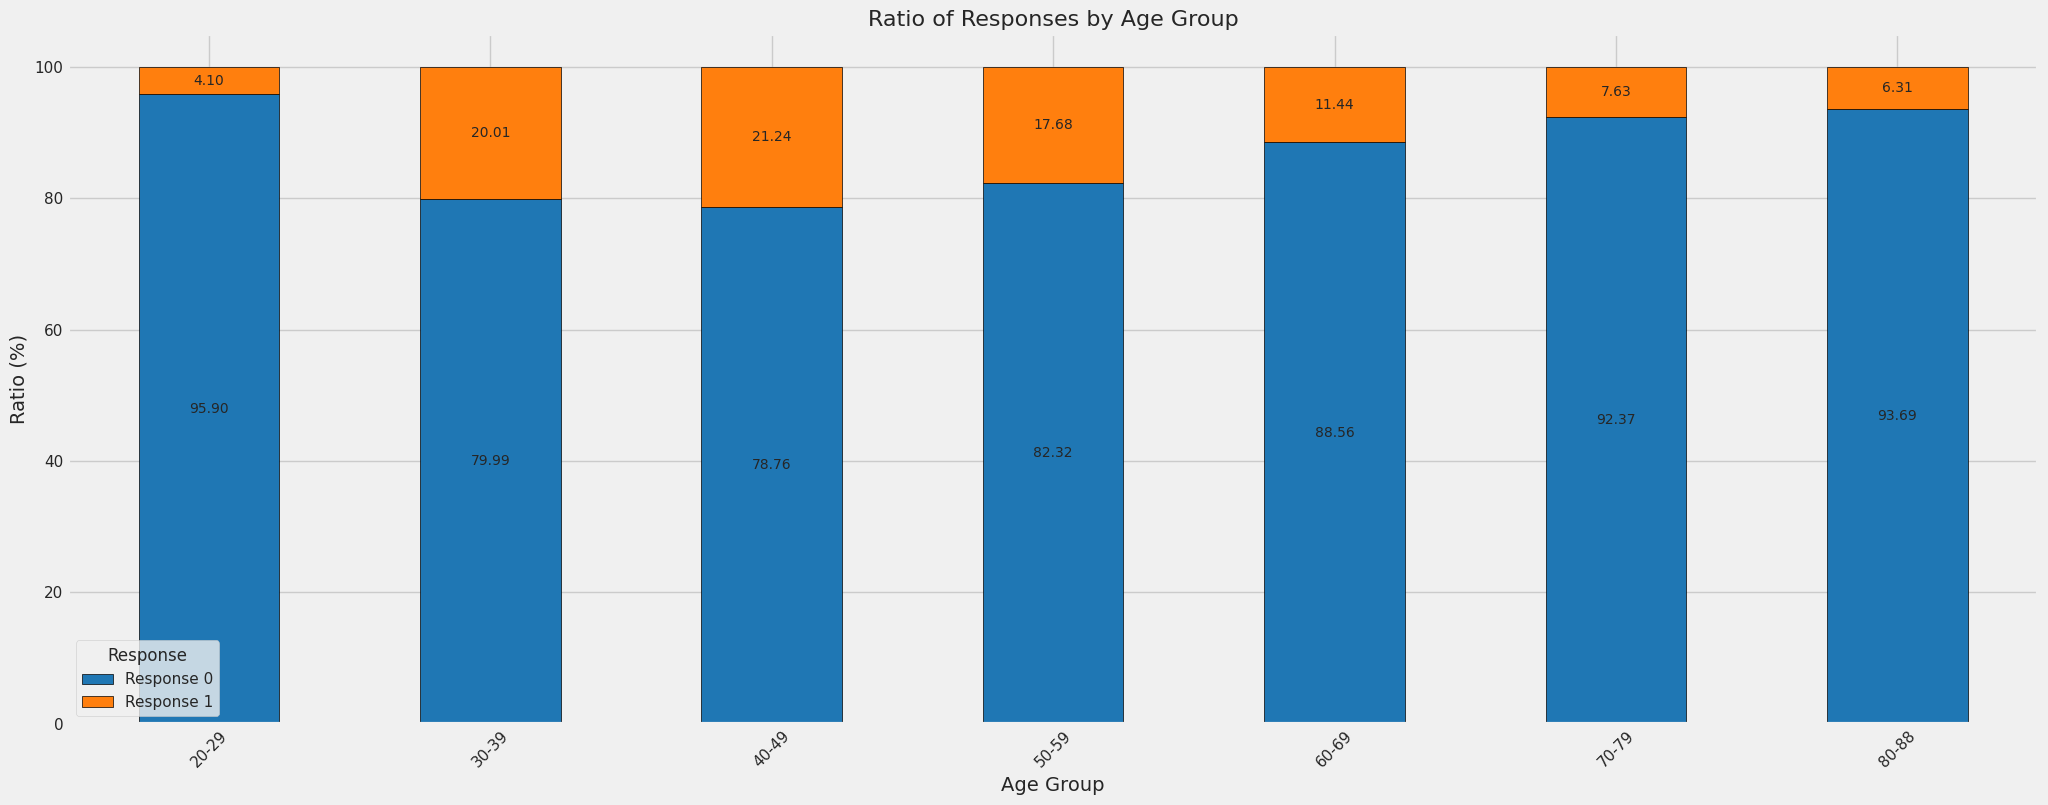

In [ ]:
age_group = df_cleaned.groupby(['age_group', 'Response']).size().unstack(fill_value=0)
age_group_ratio = age_group.div(age_group.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
age_group_ratio.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Ratio of Responses by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Ratio (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Response', labels=['Response 0', 'Response 1'])

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()


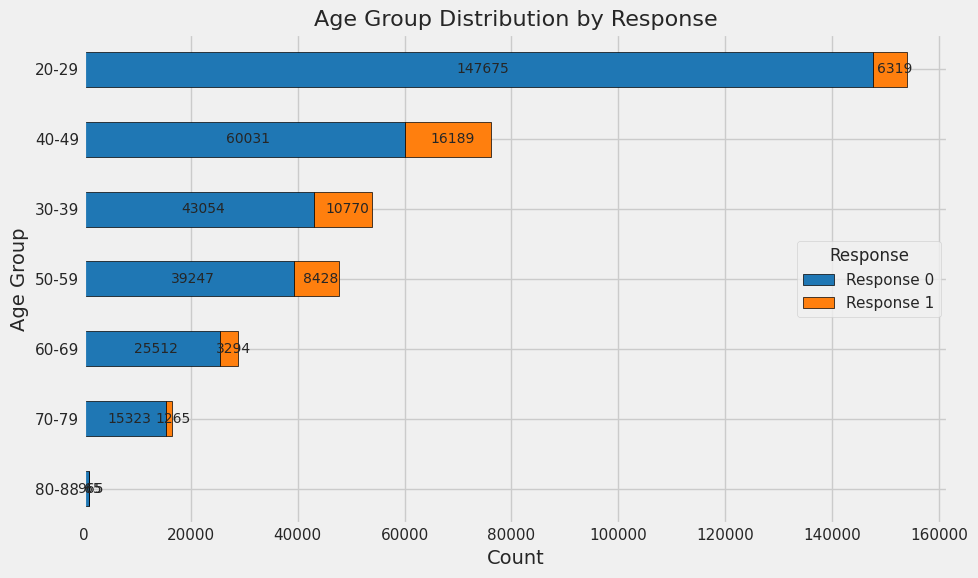

In [ ]:
pivot_table = df_cleaned.groupby(['age_group', 'Response']).size().unstack(fill_value=0)

pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=True).index]
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=ax)

plt.title('Age Group Distribution by Response', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.xticks(rotation=0)

for container in ax.containers:
    labels = [f'{int(v.get_width())}' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=3)
    ax.legend(title='Response', labels=['Response 0', 'Response 1'], loc='center right')

plt.tight_layout()
plt.show()


- **Range usia 20-29 tahun** merupakan kategori usia dengan **jumlah customer terbanyak yaitu sebanyak 153994 customer.** Sedangkan range **usia 80-88** menjadi **kategori paling sedikit yaitu hanya memiliki 1030 customer.**
- **Rentang usia 40-49** memiliki nilai respon positif tertinggi yaitu sebanyak 16189.

#### Driving License

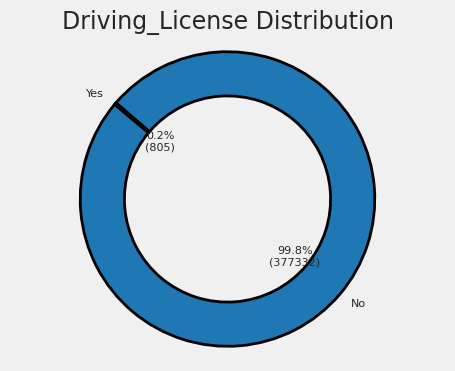

In [98]:
# Driving_Licence Distribution
prev_counts = df_cleaned['Driving_License'].value_counts()  # Ubah berdasarkan EDA column
labels = ['No', 'Yes']  # Ubah labels sesuai values yang ada pada column

plt.figure(figsize=(5, 4))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

wedges, texts, autotexts = plt.pie(
    prev_counts,  # Ubah disini sesuai line 1
    labels=labels,  # Ubah sesuai line 2
    autopct=autopct_format(prev_counts),  # Ubah sesuai line 1
    startangle=140,
    colors=['#1f77b4', '#ff7f0e'],  # Ubah warna sesuai dengan values
    wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'width': 0.3}
)
plt.axis('equal')
plt.title('Driving_License Distribution', fontsize=17)  # Ubah sesuai nama kolom

for text in texts + autotexts:
    text.set_fontsize(8)

plt.show()

In [ ]:
# Table using ratio for Driving_License and response column
DL_group = df_cleaned.groupby(['Driving_License', 'Response']).agg({'id': 'count'}).rename(  # Ubah nama dataframe sesuai kolom
    columns={'id': 'total_count'}
).reset_index()

DL_group['ratio'] = DL_group['total_count'] / DL_group['total_count'].sum() * 100  # Ubah sesuai line 1 (nama dataframe)
DL_group['ratio'] = DL_group['ratio'].apply(lambda x: '{:.2f}'.format(x))  # Ubah sesuai line 1 (nama dataframe)
DL_group = DL_group.astype({'ratio': 'float'})

DL_group


,Driving_License,Response,total_count,ratio
0,0,0,765,0.20
1,0,1,40,0.01
2,1,0,331042,87.55
3,1,1,46290,12.24


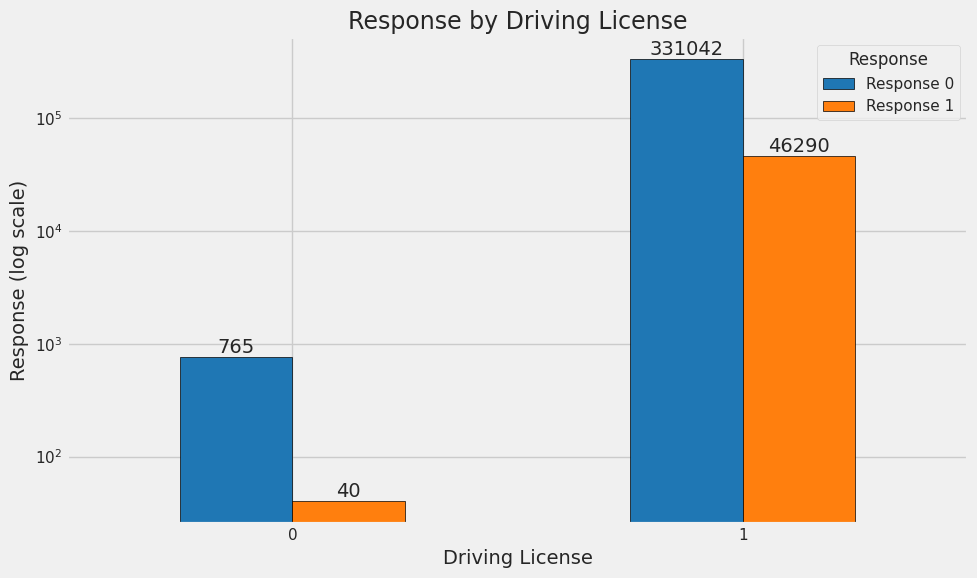

In [ ]:
# Response by Driving License
DL_group = df_cleaned.groupby(['Driving_License', 'Response']).size().unstack(fill_value=0)

ax = DL_group.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6), edgecolor='black')
ax.set_yscale('log')

plt.title('Response by Driving License', fontsize=17)
plt.xlabel('Driving License', fontsize=14)
plt.ylabel('Response (log scale)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Response', labels=['Response 0', 'Response 1'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()


- Persentase customer yang **memiliki lisensi berkendara** jauh **lebih besar yaitu 99.8% (377332)** dibandingkan **customer tanpa lisensi kendaraan** yang hanya **sebesar 0.2% (805).**
- customer yang **memiliki driving Licence maupun belum memiliki Driving License** sama-sama menunjukkan respon positif (tertarik pada asuransi) yang tinggi, dan yang memberi **respon negatif sama-sama rendah** jika dibandingkan dengan jumlah keseluruhan.
- Dapat disimpulkan bahwa **‘Driving_License’ tidak memiliki korelasi yang kuat terhadap value ‘Response’.**

#### Region Code

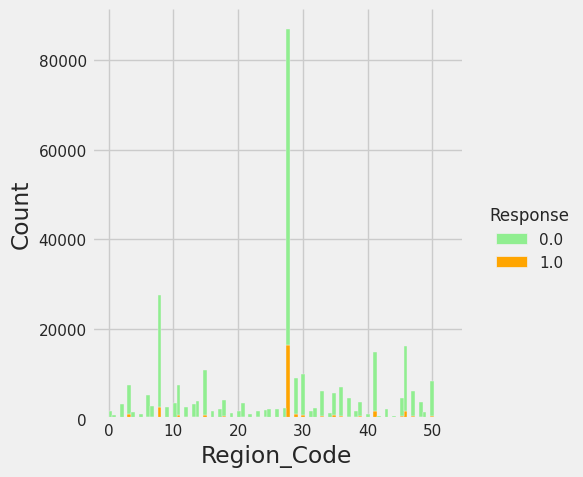

In [ ]:
#Distribusi Region_Code terhadap target
sns.displot(df_cleaned, x="Region_Code", hue="Response", alpha=1, multiple='stack', palette={0: 'lightgreen', 1: 'orange'})


In [ ]:
df_r1=df_cleaned[['Region_Code','id']].groupby('Region_Code').agg({'id':'nunique'}).reset_index()
df_r1.columns=['Region_Code','Total_Customer']

df_r2=df_cleaned[['Region_Code','id','Response']].groupby(['Region_Code', 'Response']).agg({'id':'nunique'}).reset_index()
df_r2.columns=['Region_Code','Response','Total_Customer_0_1']

df_rm1=df_r2.merge(df_r1,left_on='Region_Code', right_on='Region_Code', how='left')
df_rm1['Ratio']=(df_rm1['Total_Customer_0_1']/df_rm1['Total_Customer'])*100

df_rm1

,Region_Code,Response,Total_Customer_0_1,Total_Customer,Ratio
0,0,0.0,1532,1672,91.626794
1,0,1.0,140,1672,8.373206
2,1,0.0,734,824,89.077670
3,1,1.0,90,824,10.922330
4,2,0.0,3059,3295,92.837633
...,...,...,...,...,...
101,50,1.0,502,8413,5.966956
102,51,0.0,121,142,85.211268
103,51,1.0,21,142,14.788732
104,52,0.0,180,207,86.956522


In [ ]:
df_rm1[(df_rm1['Response']==1)&(df_rm1['Region_Code']==28)]

,Region_Code,Response,Total_Customer_0_1,Total_Customer,Ratio
57,28,1.0,16376,87049,18.812393


In [ ]:
df_rm1[(df_rm1['Response']==1)&(df_rm1['Region_Code']==38)]

,Region_Code,Response,Total_Customer_0_1,Total_Customer,Ratio
77,38,1.0,317,1649,19.223772


<Axes: ylabel='Region_Code'>

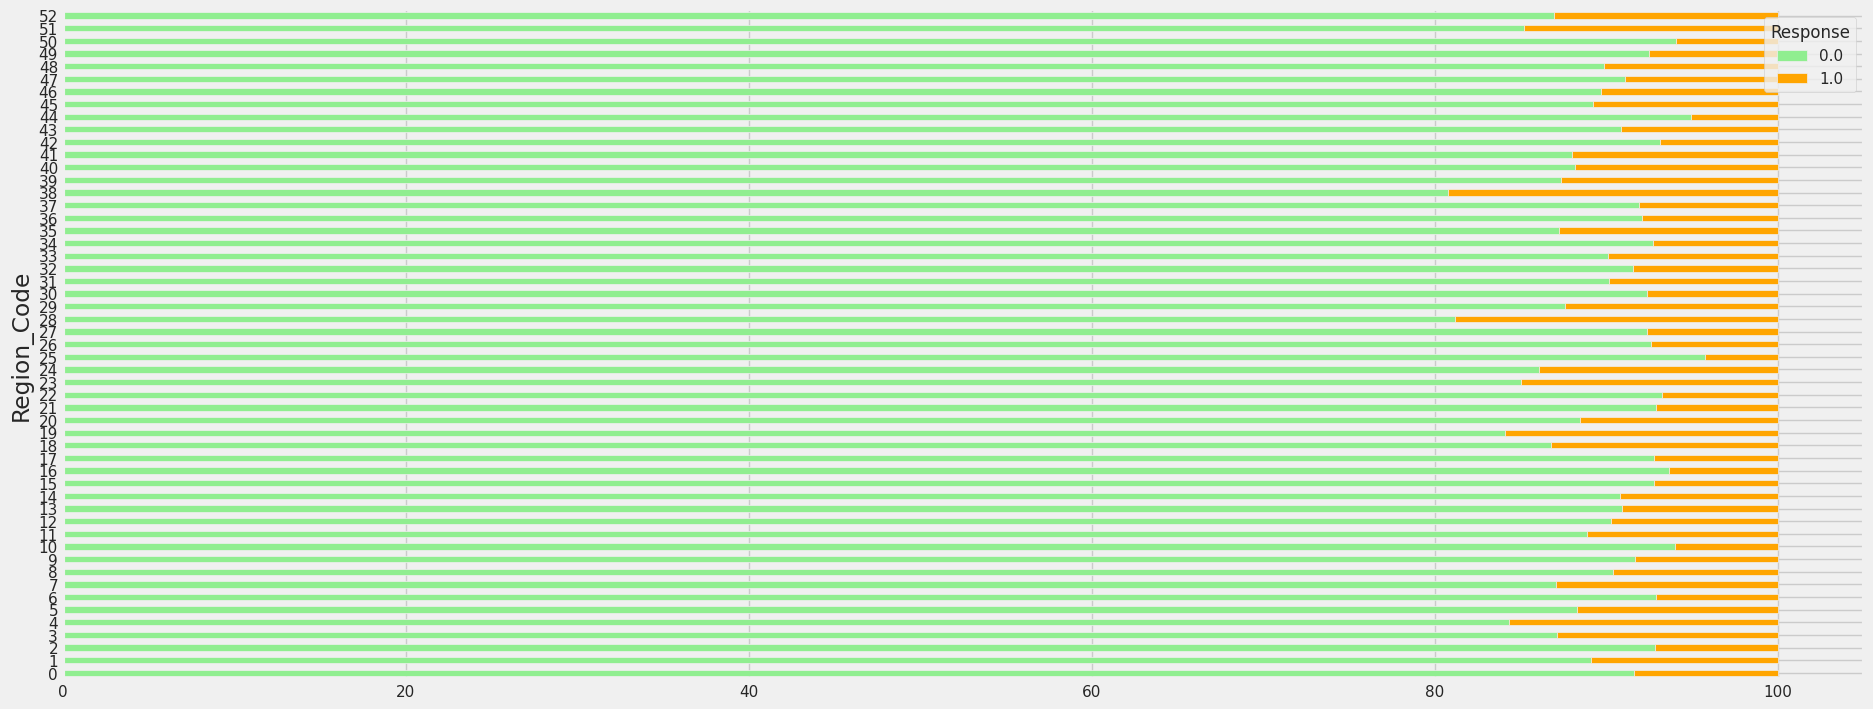

In [ ]:
drpl=df_rm1.pivot_table(index='Region_Code', columns='Response',values='Ratio')
drpl.plot(kind='barh',stacked=True, color={0: 'lightgreen', 1: 'orange'})

- Distribusi Total customer berdasarkan ‘Region_code’ cenderung merata kecuali pada 2 titik region yang memiliki total customer >20000. Region code 28 memiliki customer paling tinggi lebih dari 80000.
- Rasio response 1 terbesar dimiliki oleh region code 38 yaitu hampir 20%. Akan tetapi total customer dengan respon 1 paling banyak dimiliki oleh region code 28. Rasio respon 1 pada region 28 juga hampir 20%.

#### Previously Insured

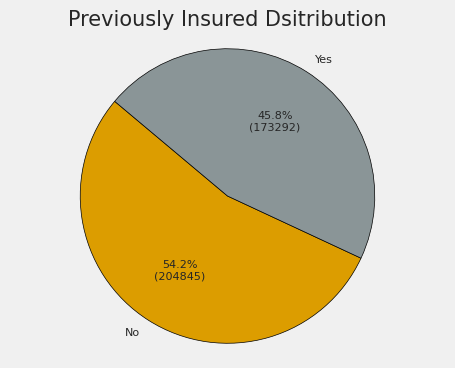

In [ ]:
# Pie chart of previously insured column (ubah commnet sesuai column)
prev_counts = df_cleaned['Previously_Insured'].value_counts() # Ubah berdasarkan EDA column
labels = ['No', 'Yes']  # Ubah labels sesuai values yang ada pada column

plt.figure(figsize=(5, 4))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

wedges, texts, autotexts = plt.pie(
    prev_counts, # Ubah disini sesuai line 1
    labels=labels,  # Ubah sesuai line 2
    autopct=autopct_format(prev_counts), # Ubah sesuai line 1
    startangle=140,
    colors=['#DC9D00','#8A9597'], # Ubah warna seusai dengan values
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('equal')
plt.title('Previously Insured Dsitribution', fontsize=15)  # Ubah sesuai nama kolom

for text in texts + autotexts:
    text.set_fontsize(8)

plt.show()

In [ ]:
# Table using ratio for prreviously insureed and response column  (ubah commnet sesuai column)
prev_group = df_cleaned.groupby(['Previously_Insured','Response']).agg({'Gender':'count'}).rename(     # Ubah nama dataframe sesuai kolom
    columns={'Gender':'total_count'}
).reset_index()
prev_group['ratio'] = prev_group['total_count'] / prev_group['total_count'].sum() *100  # Ubah sesuai line 1 (nama dataframe)
prev_group['ratio'] = prev_group['ratio'].apply(lambda x: '{:.2f}'.format(x))   # Ubah sesuai line 1 (nama dataframe)
prev_group = prev_group.astype({'ratio':'float'})
prev_group

,Previously_Insured,Response,total_count,ratio
0,0,0,158673,41.96
1,0,1,46172,12.21
2,1,0,173134,45.79
3,1,1,158,0.04


Text(0.5, 0, 'Previously Insured')

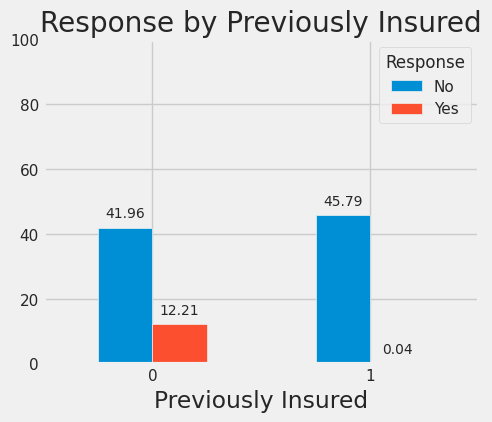

In [ ]:
# Previously insured terhadap response dalam rasio barplot (ubah commnet sesuai column)
bar_plot = prev_group.pivot(  # Ubah sesuai data frame yang digunakan
    index='Previously_Insured', columns='Response', values='ratio'  # Ubah sesuai kolom pada data frame yang digunakan
).plot(kind='bar', figsize=(5,4), rot=0)
plt.ylim(0,100)
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:,.2f}',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom',
                      size=10, xytext=(0, 5),
                      textcoords='offset points')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.title('Response by Previously Insured') # Ubah berdasarkan kolom
plt.xlabel('Previously Insured')  # Ubah sesuai kolom

* Pada dataset menunjukkan customer sedikit yang memiliki asuransi sebelumnya
*  Yang menerima tawaran cenderung adalah customer yang tidak memiliki asuransi sebelumny

#### Vehicle Age

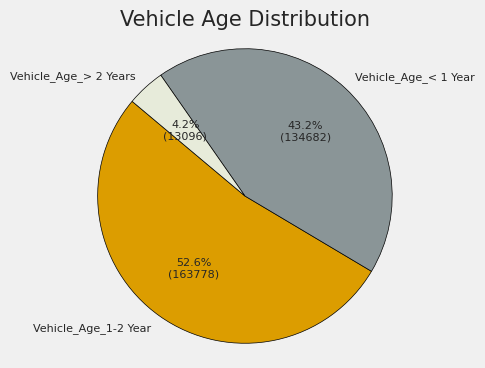

In [ ]:
# Pie chart of vehile age column (ubah commnet sesuai column)
vage_counts = df_cleaned[['Vehicle_Age_1-2 Year',
                         'Vehicle_Age_< 1 Year',
                         'Vehicle_Age_> 2 Years']].value_counts() # Ubah berdasarkan EDA column
labels = ['Vehicle_Age_1-2 Year',
          'Vehicle_Age_< 1 Year',
          'Vehicle_Age_> 2 Years']  # Ubah labels sesuai values yang ada pada column

plt.figure(figsize=(5, 4))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

wedges, texts, autotexts = plt.pie(
    vage_counts, # Ubah disini sesuai line 1
    labels=labels,  # Ubah sesuai line 2
    autopct=autopct_format(vage_counts), # Ubah sesuai line 1
    startangle=140,
    colors=['#DC9D00','#8A9597','#E7EBDA'], # Ubah warna seusai dengan values
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('equal')
plt.title('Vehicle Age Distribution', fontsize=15)  # Ubah sesuai nama kolom

for text in texts + autotexts:
    text.set_fontsize(8)

plt.show()

In [ ]:
# Table using ratio for vehicle age and response column  (ubah commnet sesuai column)
vage_group = df_cleaned.groupby(['Vehicle_Age_1-2 Year',
                                 'Vehicle_Age_< 1 Year',
                                 'Vehicle_Age_> 2 Years',
                                 'Response']).agg({'Gender':'count'}).rename(     # Ubah nama dataframe sesuai kolom
    columns={'Gender':'total_count'}
).reset_index()
vage_group['ratio'] = vage_group['total_count'] / vage_group['total_count'].sum() *100  # Ubah sesuai line 1 (nama dataframe)
vage_group['ratio'] = vage_group['ratio'].apply(lambda x: '{:.2f}'.format(x))   # Ubah sesuai line 1 (nama dataframe)
vage_group = vage_group.astype({'ratio':'float'})
vage_group

,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response,total_count,ratio
0,0,0,1,0,11230,2.97
1,0,0,1,1,4664,1.23
2,0,1,0,0,156364,41.35
3,0,1,0,1,7143,1.89
4,1,0,0,0,164213,43.43
5,1,0,0,1,34523,9.13


Text(0.5, 0, 'Vehicle Age')

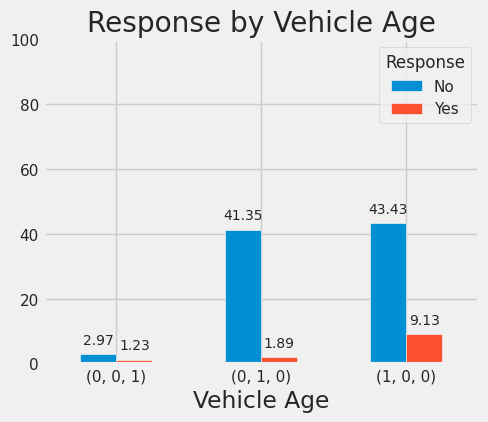

In [ ]:
# Vehicle age terhadap response dalam rasio barplot (ubah commnet sesuai column)
bar_plot = vage_group.pivot(  # Ubah sesuai data frame yang digunakan
    index=['Vehicle_Age_1-2 Year',
           'Vehicle_Age_< 1 Year',
           'Vehicle_Age_> 2 Years'], columns='Response', values='ratio'  # Ubah sesuai kolom pada data frame yang digunakan
).plot(kind='bar', figsize=(5,4), rot=0)
plt.ylim(0,100)
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:,.2f}',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom',
                      size=10, xytext=(0, 5),
                      textcoords='offset points')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.title('Response by Vehicle Age') # Ubah berdasarkan kolom
plt.xlabel('Vehicle Age')  # Ubah sesuai kolom

* Pada dataset, kendaraan paling banyak adalah kendaraan yang berumur antara 1-2 tahun, dibawah 1 tahun dan lebih dari 2 tahun
* Kendaraan dengan reponse positf adalah pengguna dengan kendaraan 1-2 year lalu diikuti oleh kendaraan dibawah satu tahun

#### Vehicle Damage

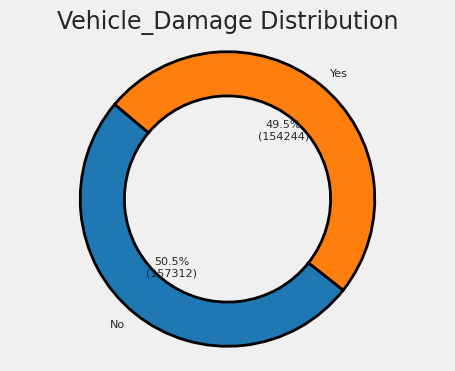

In [ ]:
#Vehicle Damage Distribution
dmg_counts = df_cleaned['Vehicle_Damage'].value_counts()  # Ubah berdasarkan EDA column

plt.figure(figsize=(5, 4))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

wedges, texts, autotexts = plt.pie(
    dmg_counts,  # Ubah disini sesuai line 1
    labels=labels,  # Ubah sesuai line 2
    autopct=autopct_format(dmg_counts),  # Ubah sesuai line 1
    startangle=140,
    colors=['#1f77b4', '#ff7f0e'],  # Ubah warna sesuai dengan values
    wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'width': 0.3}
)
plt.axis('equal')
plt.title('Vehicle_Damage Distribution', fontsize=17)  # Ubah sesuai nama kolom

for text in texts + autotexts:
    text.set_fontsize(8)

plt.show()

In [ ]:
# Menghitung jumlah respon berdasarkan 'Vehicle_Damage' dan 'Response'
response_count = df.groupby(['Vehicle_Damage', 'Response']).size().unstack(fill_value=0)

print(response_count)

# Atau menampilkan tabel menggunakan pandas DataFrame untuk tampilan yang lebih rapi
response_table = pd.DataFrame(response_count)
response_table.columns = ['Response 0', 'Response 1']
response_table.index.name = 'Vehicle Damage'

print(response_table)


In [ ]:
# Menghitung jumlah respon berdasarkan 'Vehicle_Damage' dan 'Response'
response_count = df.groupby(['Vehicle_Damage', 'Response']).size().unstack(fill_value=0)

# Membuat plot batang bertumpuk
response_count.plot(kind='bar', stacked=True, figsize=(5, 3), color=['blue', 'orange'])

# Menambahkan judul dan label sumbu dengan ukuran font lebih kecil
plt.title('Response by Vehicle_Damage', fontsize=10)
plt.xlabel('Vehicle Damage', fontsize=10)
plt.ylabel('Response', fontsize=10)

# Menyesuaikan ukuran font untuk ticks
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)

# Menyesuaikan ukuran font untuk legenda
plt.legend(title='Response', labels=['Response 0', 'Response 1'], fontsize=8, title_fontsize=10)

# Menambahkan label pada setiap batang dengan ukuran font lebih kecil
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=8)

# Mengatur tata letak yang lebih ketat
plt.tight_layout()

# Menampilkan plot
plt.show()


Berdasarkan korelasi antara vehicle damage dan response didapatkan bahwa pada vehicle terjadi kerusakan maka akan meningkat jumlah response yang didapatkan.

#### Annual Premium

(0.0, 10000.0)

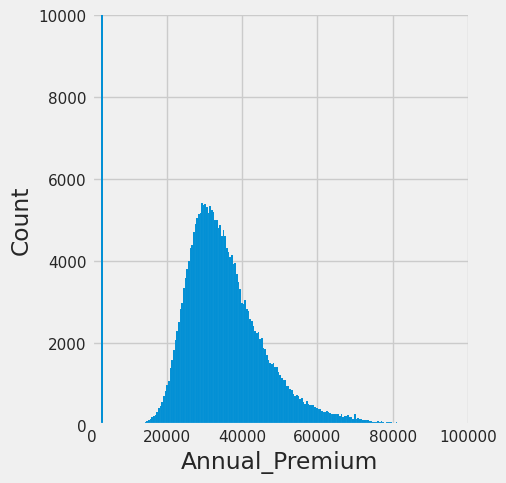

In [ ]:
#Distribusi Annual Premium
sns.displot(df_cleaned, x="Annual_Premium", alpha=1)
plt.xlim(0, 100000)
plt.ylim(0, 10000)

(0.0, 10000.0)

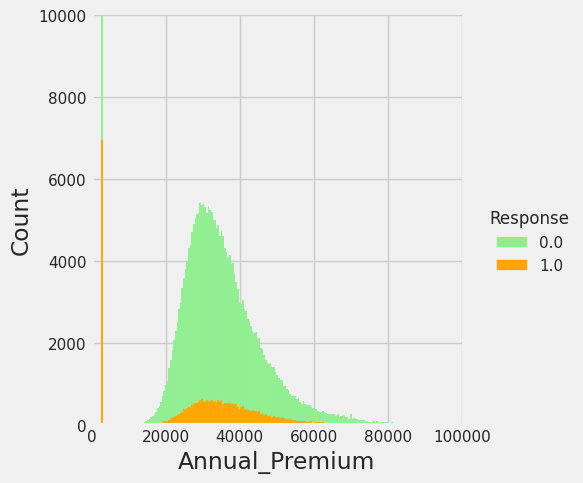

In [ ]:
#Distribusi Annual Premium terhadap Response
sns.displot(df_cleaned, x="Annual_Premium", hue="Response", alpha=1, multiple='stack', palette={0: 'lightgreen', 1: 'orange'})
plt.xlim(0, 100000)
plt.ylim(0, 10000)

In [ ]:
col         = 'Annual_Premium'
conditions  = [ df[col] <= 25000, (df[col] <= 40000) & (df[col] >= 25001), df[col] > 40000 ]
choices     = [ "A", 'B', 'C' ]

df["AP_group"] = np.select(conditions, choices, default=np.nan)

df_tg=df[['AP_group','id']].groupby('AP_group').agg({'id':'nunique'}).reset_index()
df_tg.columns=['AP_group','total_customerAP']
df_tg

In [ ]:
sns.displot(df, x="AP_group", hue="Response", alpha=1, multiple='stack', palette={0: 'lightgreen', 1: 'orange'})

1. membuat pengelompokkan dengan dibagi 3 dimana A(<25000), B(25000 - 40000), C (>40000)
2. berdasarkan grafik yang didapatkan gruop yang mempunyai Annual Premium tertinggi berada pada grup B
3. Dapat disimpulkan bahwa ‘Annual_Premium’ tidak memiliki korelasi yang kuat terhadap value ‘Response’

#### Policy Sales Channel

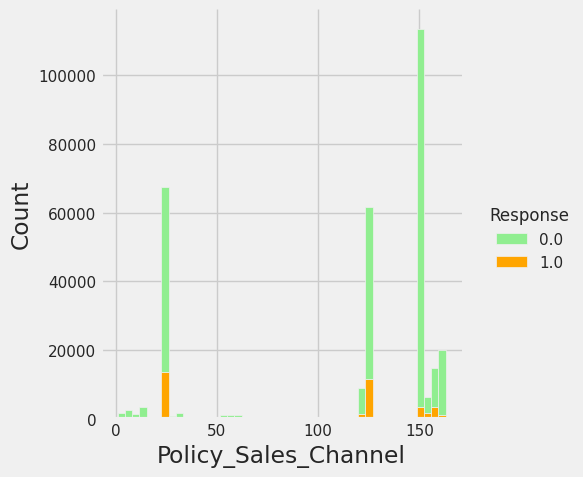

In [ ]:
#Grafik distribusi policy sales channel terhadap response
sns.displot(df_cleaned, x="Policy_Sales_Channel", hue="Response", alpha=1, multiple='stack', palette={0: 'lightgreen', 1: 'orange'})

In [ ]:
#Menampilkan nilai policy sales channel dengan count lebih dari 5000
df_1=df_cleaned[['Policy_Sales_Channel','id']].groupby('Policy_Sales_Channel').agg({'id':'nunique'}).reset_index()
df_1.columns=['Policy_Sales_Channel','Total_Customer']
df_1a=df_1[df_1['Total_Customer']>5000]
df_1a

,Policy_Sales_Channel,Total_Customer
24,26,64993
116,122,8132
118,124,60771
143,152,110143
147,156,8789
148,157,5472
151,160,17723


In [ ]:
#Menampilkan rasio response 1 pada masing-masing channel dengan count lebih dari 500
df_2=df_cleaned[['Policy_Sales_Channel','id','Response']].groupby(['Policy_Sales_Channel', 'Response']).agg({'id':'nunique'}).reset_index()
df_2.columns=['Policy_Sales_Channel','Response','Total_Customer_0_1']

df_m=df_2.merge(df_1,left_on='Policy_Sales_Channel', right_on='Policy_Sales_Channel', how='left')
df_m['Ratio']=(df_m['Total_Customer_0_1']/df_m['Total_Customer'])*100


list_ch=[26, 122, 124, 152, 154, 156, 157, 160]
df_ma=df_m[df_m['Policy_Sales_Channel'].isin(list_ch)]

df_ma

,Policy_Sales_Channel,Response,Total_Customer_0_1,Total_Customer,Ratio
47,26,0.0,51927,64993,79.896297
48,26,1.0,13066,64993,20.103703
202,122,0.0,6739,8132,82.870143
203,122,1.0,1393,8132,17.129857
205,124,0.0,49286,60771,81.101183
206,124,1.0,11485,60771,18.898817
249,152,0.0,106974,110143,97.122831
250,152,1.0,3169,110143,2.877169
253,154,0.0,3691,4904,75.265090
254,154,1.0,1213,4904,24.734910


Text(0.5, 0, 'Policy Sales Channel')

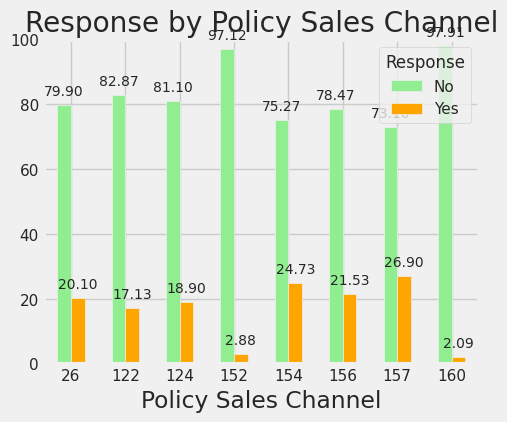

In [ ]:
# Policy sales channel terhadap response dalam rasio barplot (ubah commnet sesuai column)
bar_plot_p = df_ma.pivot(  # Ubah sesuai data frame yang digunakan
    index='Policy_Sales_Channel', columns='Response', values='Ratio'  # Ubah sesuai kolom pada data frame yang digunakan
).plot(kind='bar', figsize=(5,4), rot=0, color={0: 'lightgreen', 1: 'orange'})
plt.ylim(0,100)
for p in bar_plot_p.patches:
    height = p.get_height()
    bar_plot_p.annotate(f'{height:,.2f}',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom',
                      size=10, xytext=(0, 5),
                      textcoords='offset points')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.title('Response by Policy Sales Channel') # Ubah berdasarkan kolom
plt.xlabel('Policy Sales Channel')  # Ubah sesuai kolom

* Saluran komunikasi yang paling banyak melakukan panggilan adalah kode 26, 122, 124, 152, 154, 156, 157, dan 160.
* Berdasarkan saluran tersebut rasio response 1 terbesar dimiliki oleh kode 157 (26,9% yaitu 1472 customer). Sementara jumlah customer dengan response 1 terbanyak dimiliki oleh kode 26 (20,1% yaitu 13066 customer)
* Saluran kode 152 paling banyak melakukan panggilan (110143 customer) namun customer yang memberi response 1 hanya 2,8%nya yaitu 3169 orang.

#### Vintage

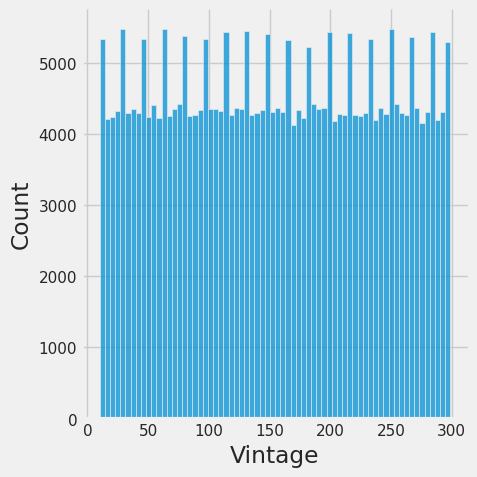

In [ ]:
#Grafik distribusi vintage
sns.displot(df_cleaned, x="Vintage")

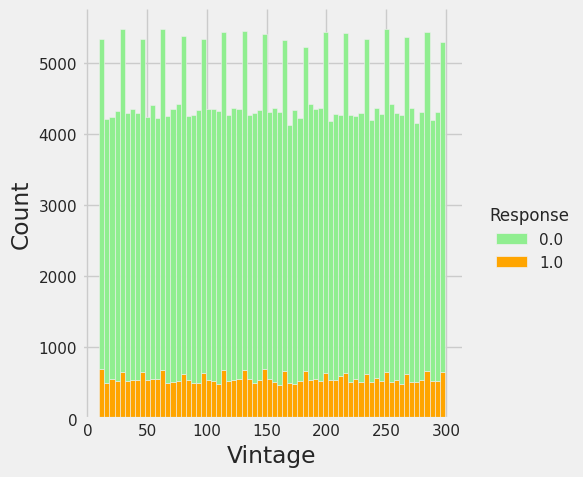

In [ ]:
#Grafik distribusi vintage terhadap target
sns.displot(df_cleaned, x="Vintage", hue="Response", alpha=1, multiple='stack', palette={0: 'lightgreen', 1: 'orange'})

In [ ]:
#Menampilkan rasio response 0 dan 1 pada setiap vintage
df_v1=df_cleaned[['Vintage','id']].groupby('Vintage').agg({'id':'nunique'}).reset_index()
df_v1.columns=['Vintage','Total_Customer']

df_v2=df_cleaned[['Vintage','id','Response']].groupby(['Vintage', 'Response']).agg({'id':'nunique'}).reset_index()
df_v2.columns=['Vintage','Response','Total_Customer_0_1']

df_m1=df_v2.merge(df_v1,left_on='Vintage', right_on='Vintage', how='left')
df_m1['Ratio']=(df_m1['Total_Customer_0_1']/df_m1['Total_Customer'])*100

df_m1

,Vintage,Response,Total_Customer_0_1,Total_Customer,Ratio
0,10.0,0.0,957,1070,89.439252
1,10.0,1.0,113,1070,10.560748
2,11.0,0.0,947,1103,85.856754
3,11.0,1.0,156,1103,14.143246
4,12.0,0.0,885,1028,86.089494
...,...,...,...,...,...
575,297.0,1.0,111,1043,10.642378
576,298.0,0.0,975,1121,86.975914
577,298.0,1.0,146,1121,13.024086
578,299.0,0.0,902,1045,86.315789


<Axes: ylabel='Vintage'>

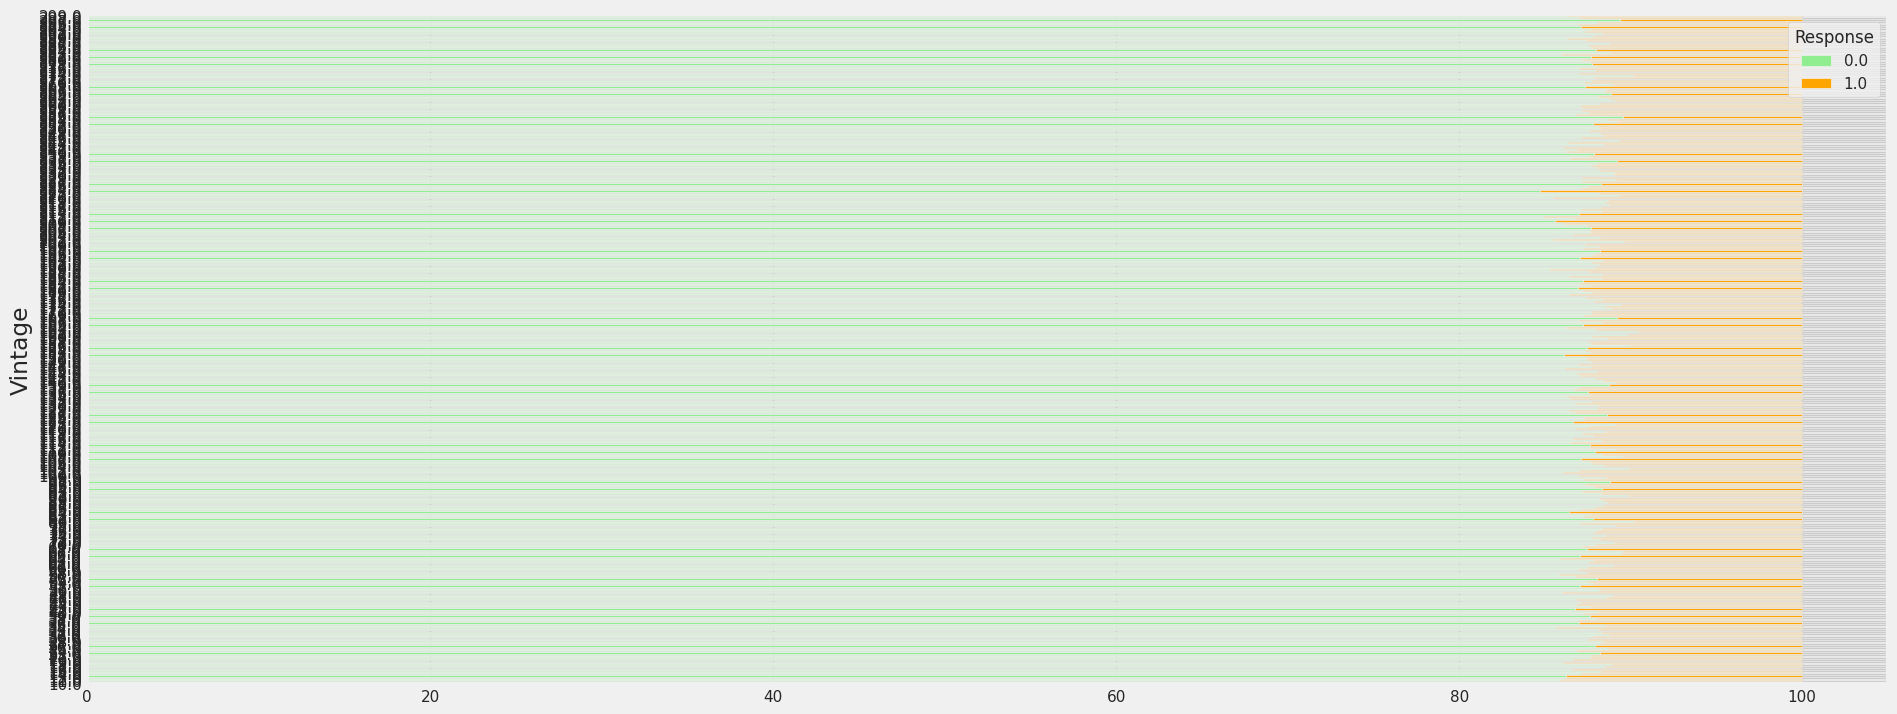

In [ ]:
#Membuat plot berdasarkan rasio tersebut
dfl=df_m1.pivot_table(index='Vintage', columns='Response',values='Ratio')
dfl.plot(kind='barh',stacked=True, color={0: 'lightgreen', 1: 'orange'})

* Total customer relatif tersebar secara merata berdasarkan vintage.
* Tidak ada hubungan kuat antara value vintage terhadap response.

# For Later

### Multivariate Analysis

## Features Transformation

In [ ]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

df_copy = df_minmax
df_copy.head()

## ML

In [ ]:
#